<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
                          count        mean         std     min       25%  \
Pregnancies               768.0    3.845052    3.369578   0.000   1.00000   
Glucose                   768.0  120.894531   31.972618   0.000  99.00000   
BloodPres

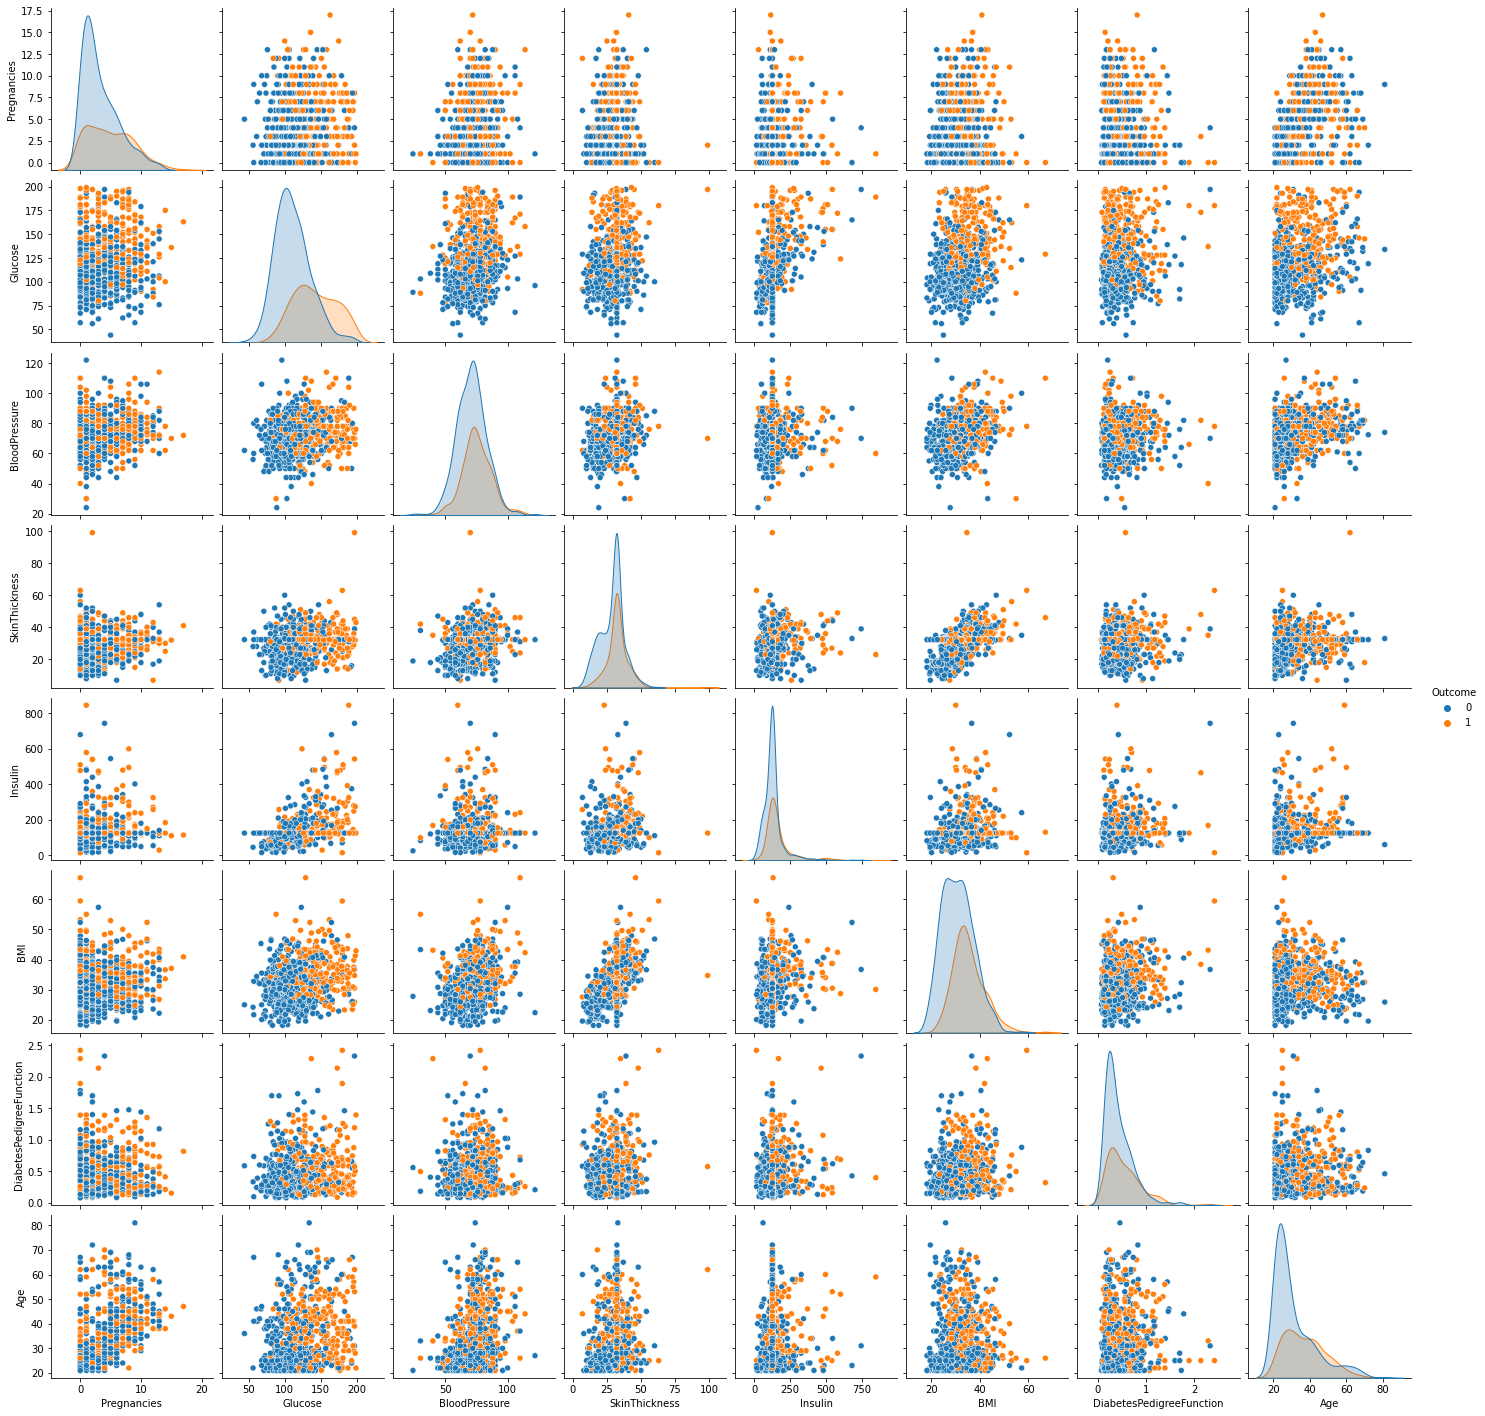

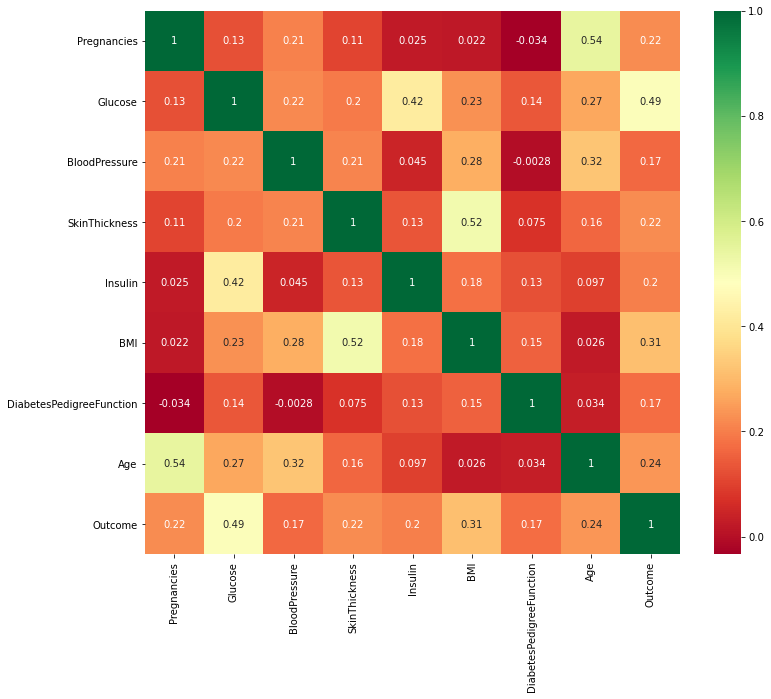

Max Train Score : 100.0 & K = [1] 
Max Test Score : 74.609375 & K = [13, 14]


C:\Users\dogukan.ozgen\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\dogukan.ozgen\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


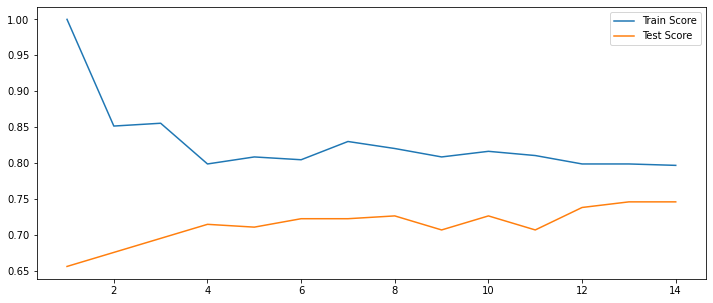

Score with 13k: 0.74609375
Predicted    0   1
True              
0          144  23
1           42  47
              precision    recall  f1-score   support

           0       0.77      0.86      0.82       167
           1       0.67      0.53      0.59        89

    accuracy                           0.75       256
   macro avg       0.72      0.70      0.70       256
weighted avg       0.74      0.75      0.74       256



In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('dataset/diabetes.csv')

data.info(verbose=True)

print(data.describe().T)

diabetesDataCopy = data.copy(deep=True)

#print('Null var mı: ',diabetesDataCopy.isnull().sum())

diabetesDataCopy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = diabetesDataCopy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN) #sıfır olanlara Nan yazacak


print(diabetesDataCopy.isnull().sum())

#ikili ilişkiler
diabetesDataCopy['Glucose'].fillna(diabetesDataCopy['Glucose'].mean(),inplace=True)
diabetesDataCopy['BloodPressure'].fillna(diabetesDataCopy['BloodPressure'].mean(),inplace=True)
diabetesDataCopy['Insulin'].fillna(diabetesDataCopy['Insulin'].median(),inplace=True)
diabetesDataCopy['BMI'].fillna(diabetesDataCopy['BMI'].median(),inplace=True)
diabetesDataCopy['SkinThickness'].fillna(diabetesDataCopy['BMI'].median(),inplace=True)


sns.pairplot(diabetesDataCopy,hue='Outcome')
plt.show()

#korelasyon için heatmap()

plt.figure(figsize=(12,10))
p = sns.heatmap(diabetesDataCopy.corr(),annot=True,cmap='RdYlGn')
plt.show()



#StandardScaler
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()

#get x,y
x = pd.DataFrame(sc_x.fit_transform(diabetesDataCopy.drop(['Outcome'],axis=1)),
                 columns=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age'])
y = diabetesDataCopy.Outcome

#train 

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=1/3, random_state=0,stratify=y) #stratify ile rassallığı dengeli dağıtıyoruz

#model

from sklearn.neighbors import KNeighborsClassifier #komsularına bakıp sınıflandırıyor


test_score = []

train_score = []

for i in range(1,15):
    knn = KNeighborsClassifier(i)
    knn.fit(x_train,y_train)

    train_score.append(knn.score(x_train,y_train))
    test_score.append(knn.score(x_test,y_test))


#max scores

max_train_score = max(train_score)
train_score_ind = [i for i, v in enumerate(train_score) if v == max_train_score]
print('Max Train Score : {} & K = {} '.format(max_train_score * 100, list(map(lambda x: x+1,train_score_ind))))


max_test_score = max(test_score)
test_score_ind = [i for i, v in enumerate(test_score) if v == max_test_score]
print('Max Test Score : {} & K = {}'.format(max_test_score * 100, list(map(lambda x: x+1,test_score_ind))))

#graph

plt.figure(figsize =(12,5))
p = sns.lineplot(range(1,15),train_score, markers='*',label = 'Train Score')

p = sns.lineplot(range(1,15),test_score, markers='o',label = 'Test Score')
plt.show()

# for K=13

knn = KNeighborsClassifier(13)
knn.fit(x_train,y_train)
score = knn.score(x_test,y_test)

print('Score with 13k: {}'.format(score))


#conf matrix

from sklearn.metrics import confusion_matrix

y_pred = knn.predict(x_test)

confusion_matrix(y_test,y_pred)

ct = pd.crosstab(y_test,y_pred,rownames=['True'], colnames=['Predicted'],margins_name=True)

print(ct)

from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

